This demonstration shows how to work with color channels to explore image compression
using the Singular Value Decomposition (SVD).

In [1]:
using Images, TestImages
using LinearAlgebra

img = float.(testimage("mandrill"))
channels = channelview(img)

function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    clamp01!(M)
end

rank_approx (generic function with 1 method)

For each channel, we do SVD decomposition, and then reconstruct the channel using only the K
largest singular values.

The image is compressed because for each channel we only need to save two small matrices and one
vector -- truncated part of `(U, S, V)`. For example, if the original image is gray image of size
`(512, 512)`, and we rebuild the image with $50$ singular values, then we only need to save
$2 \times 512 \times 50 + 50$ numbers to rebuild the image, while original image has
$512 \times 512$ numbers. Hence this gives us a compression ratio $19.55\%$ if we don't consider
the storage type.

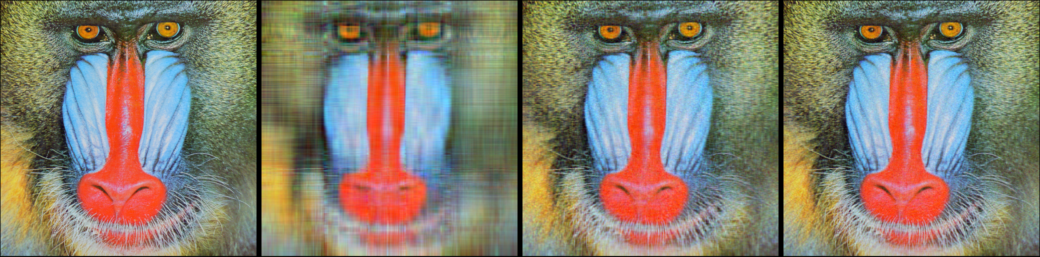

In [2]:
# before julia v1.1:
# svdfactors = (svd(channels[1,:,:]), svd(channels[2,:,:]), svd(channels[3,:,:]))
svdfactors = svd.(eachslice(channels; dims=1))
imgs = map((10, 50, 100)) do k
    colorview(RGB, rank_approx.(svdfactors, k)...)
end

mosaicview(img, imgs...; nrow=1, npad=10)

From left to right: original image, reconstructed images using 10, 50, 100 largest singular values.
We can see that $50$ largest singular values are capable of rebuilding a pretty good image.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*